# Multi-variate linear regression

## 1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n \times 1$-vector $x=(x_1,x_2,...,x_n)^T$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (1)
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n \times 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as

$$
RSS(w)= \sum \limits_i \varepsilon_i^2= \sum \limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2)
$$

or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity.

## 2. Geometry of Least Squares

According to (3), model estimates $\hat{Y}$ corresponding to the given points in $X$ are
$$
\hat{Y}=X \hat{w}=X(X^T X)^{-1}X^T Y.
$$
This way matrix $H=X(X^T X)^{-1}X^T$ performs an ortogonal projection $HY$ of a given vector of observations $Y$ onto the linear space of all possible linear combinations of columns of $X$.

## 3. Explanations of R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

## 4. Feature scaling

Often in order to get some sense out of the values of $w_j$ one might want to normalize the features first, bringing them on the same scale. For example one can standardize, transforming independent variables into their standard scores (also called z-scores, normal scores):
$$
x_j^*=\frac{x_j-\overline{x}_j}{\sigma_j}
$$
where $\overline{x}_j=E[X_j]$ and $\sigma_j=std[X_j]$ are the corresponding sample mean and standard deviation. This however does not apply to a constant dummy variable corresponding to the intercept term if present. One might omit this dummy variable in case if responce variable is also standardized (then it's mean is also zero and there is no need for an intercept). 

Then, the resulting coefficients $\hat{w}_j$ could be interpreted as a relative (or absolute if the output variable is also standardized) strength of each regressor's impact on the responce variable $x_j$.

## 5. Case of orthogonal regressors

Consider a particular case of orthogonal regressors. I.e. suppose that for each pair of $j\neq k$ the inner product equals to zero: $$<X_j,X_k> \quad= \quad X_j^T X_k = \sum\limits_i x_j^i x_k^i=0$$
For the standardized regressors orthogonality is equivalent to being uncorrelated; more generally if at least one of the regressors $x_j$ is standardized (consequently $E[X_j]=0$) then:
$$
0=corr[X_j,X_k]=\frac{Cov[X_j,X_k]}{std[X_j]std[X_k]}=\frac{\frac{<X_j,X_k>}{N}-E[X_j]E[X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>}{N std[X_j]std[X_k]}.
$$
In that case it is possible to show that least square estimate for the multiple regression could be built from a set of univariate regressions of $y$ vs each of the regressors $x_j$ taken separately. Then
$$
\hat{w_j}=\frac{X_j^T Y}{X_j^T X_j}.
$$
If $X_j$ is also standardized, so that $E[X_j]=0$ and $Var[X_j]=1$, the above could be re-written as
$$
\hat{w_j}=Cov[X_j,Y].
$$
Also this way 
$$
Var[Y]=Var[\varepsilon]+\sum_j Var[w_j X_j]=\sigma^2+\sum_j w_j^2.
$$
This gives a very intuitive interpretation of the regression coefficients (or actually their squares) as a **decomposition of the explained part of response variable's variation $Var[Y]-\sigma^2$**. 

However this works only for the basic least-square estimates $w=\hat{w}$, $\sigma=\hat{\sigma}$. While depending on the estimation technique used for $\hat{w}$ and $\hat{\sigma}$ (like using unbiased estimates for example), this equation might only hold approximately.

If $Y$ is also standardized then $\hat{w_j}=corr[X_j,Y]$, i.e. coefficients of such a regression are simply the correlation coefficients of observed sample of responce variable vs each of the regressors. So basically the multivariate regression with ortognal standardized regressors and standardized responce variable could be expressed as
$$
y=\sum\limits_j corr[X_j,Y] x_j+\varepsilon.
$$
This way the regression coefficients are simply the correlations between corresponding regressors and the responce variable's observations.

Although the case of ortogonal (uncorrelated) regressors seems to be quite a special one, during the next session, we'll see that actually every regression could be transformed to such a case through a principle component decomposition.


## 6. Non-linear polynimial regression 

Multi-variate linear regression could be also used in order to fit non-linear models, such as polynomial one for example. If one needs to fit a dependence of 
$$
y=w_mx^m + w_{m-1} x^{m-1} + \ldots + w_1 x + w_0+\epsilon,
$$
one way of doing that it thourgh a multi-variate regression, selecting 
$$
y\sim 1,x,x^2,\ldots,x^{m}
$$ 
as $m+1$ features. Similarly a polinomial form of several variables could be fit, like 
$$
y\sim w_{2,0}x_1^2+w_{1,1}x_1 x_2+w_{2,0}x_2^2+w_{1,0}x_1+w_{0,1}x_2+w_{0,0}
$$
could be handled over a feature space including
$$
y\sim 1,x_1,x_2,x_1^2,x_2^2.
$$

# Lab Session

In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/'

Populating the interactive namespace from numpy and matplotlib


## Shortcuts:
* Enter-combination
* "a, b, dd, [x, c & v]"
* Tab-completion
* Question mark (?)
* Copy or Reference

# Example 1, basics
## Try to fit y given $y = w_0 + w_1x_1 + w_2x_2 + \epsilon$

In [2]:
data1 = pd.read_csv(path + 'Example1.csv')
data1.head(3)

,x1,x2,y
0,1.964692,-2.138607,-5.605927
1,-2.731485,0.513148,-18.856722
2,2.194690,-0.768935,-6.063095


### (A) Matrix computation
### $$\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $$

In [3]:
#Q1. Create a new column x0 for intercept, set the values to 1
data1['x0'] = 1

#Q2. Create X and Y in matrix form then use matrix computation formula to calculate the coefficients
X = np.matrix(data1.loc[:,['x0','x1','x2']])
Y = np.matrix(data1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[-10.10498527]
 [  2.67679769]
 [ -0.70613511]]


### (B) *statsmodels* module

In [4]:
#Q3. Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients
lm1 = smf.ols(formula = 'y ~ x1 + x2', data = data1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.776112
Intercept   -10.104985
x1            2.676798
x2           -0.706135
dtype: float64


In [5]:
#Q4. Compare the coefficients obtained through different methods
pd.DataFrame({'Matrix_Computation':w.tolist(), 'Regression':lm1.params})
# First create a dict object, claiming the labels and respective data, then convert it to a data frame

,Matrix_Computation,Regression
Intercept,[-10.1049852733],-10.104985
x1,[2.67679768576],2.676798
x2,[-0.706135109154],-0.706135


In [6]:
#Q5. Find the max/min of each variable and then plot the observation and prediction in 3D plot
data1.describe()

,x1,x2,y,x0
count,20.000000,20.000000,20.000000,20.0
mean,0.027218,-0.075481,-9.978829,1.0
std,2.397628,2.247203,7.251472,0.0
min,-4.078951,-4.403221,-24.968052,1.0
25%,-1.428640,-1.797155,-14.739759,1.0
50%,-0.652825,-0.022391,-9.617834,1.0
75%,2.022191,1.444395,-6.344681,1.0
max,4.807642,3.933892,7.571092,1.0


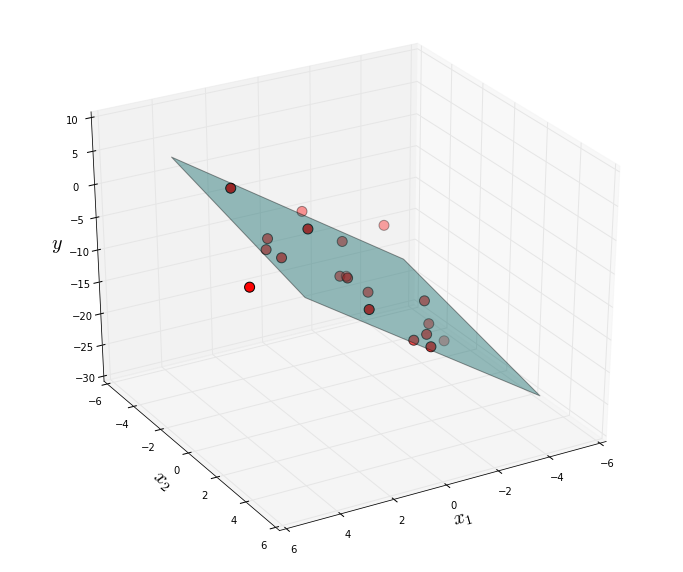

In [7]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data1.x1, data1.x2, data1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## Example 2, Income vs Education
### Memo:
* **IncomePerCapita**----measured in USD
* **PopOver25** et al----population number under each category, e.g.
    * total population over 25 years old
    * holding a Bachelor's degree
    * graduating from professional school, etc.

Starting from now we denote Income per capita by IPC:
$$IPC = \frac{Total \: Income}{Total \: Population}$$
But Total Income can be calculated as
$$ Total\: Income = \sum_k Total \: Income \:in\: Category_k$$
$$ = \sum_k (IPC \: within \: Category_k  \times Population \: of\: Category_k)$$
Then, IPC can be rewritten as
$$ \sum_k (IPC \: within \: Category_k  \times \frac{Population \: of\: Category_k}{Total \: Population})$$

$$= \sum_{k} (I_k \times p_k)$$

where k is the category index, $I_k$ is the average income within category k, and $p_k$ is the population percentage of category k.  
Our goal is to fit these $I_k$ as regression coefficients, note that since all these percentages sum up to 100%, we can omit one $p_k$ and rewrite this term as 1 minus the rest. For example, if there are 3 categories in total, we have:
$$p_1 + p_2 + p_3 = 1$$which means$$p_3 = 1 - p_1 - p_2$$
Hence  $$IPC = I_1p_1 + I_2p_2 + I_3p_3$$ $$= I_1p_1 + I_2p_2 + I_3(1 - p_1 -p_2)$$ $$= I_3 + (I_1 - I_3)p_1 + (I_2 - I_3)p_2$$
which means we are equivalently fitting $I_3, (I_1 - I_3), (I_2 - I_3)$ rather than $I_1, I_3, I_3$, this is also where the intercept ($I_3$) comes from.

In [8]:
data2 = pd.read_csv(path + 'IncomeEduReg.csv', index_col = 0)
data2.head()

,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
Zipcode,,,,,,,,,
10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
10004,98020.0,2279,29,87,305,984,550,86,238
10005,99633.0,5954,133,103,454,2745,1637,219,663


In [9]:
# Q1. Load data, verify that, in each zip code, "PopOver25" is indeed the sum of all other population categories

In [10]:
# Q2. Make sure there is no NaN (Not a number) or 0 in the denominator before converting population into percentage
    # Simply divide each column by the total population "PopOver25"
    # Leave the result in form of 58(%) rather than 0.58

In [11]:
# Q3. Rearrange the dataset (of percentages, not population) as follows:
    # Q3.1 Create a new column called "Undergrad", containing the sum of "Bachelor" and "SomeCollege"
    # Q3.2 Create a new column called "Graduate", containing the sum of "Master" and "Doctorate"
    # Q3.3 Create a new column called "UpToHighSchool", containing the sum of "LessThanHS" and "HighSchool"
    # Q3.4 "ProfessionalSchool" remains unchanged
        #  --so we have effectively simplified the model with 4 categories
    # Q3.5 Leave out the "UpToHighSchool" column then regress over the other 3 (Undergrad + Graduate + ProfSchool)

In [12]:
# Q4. Visualize the data by plotting the observation versus our prediction in a 2D plot

## Example 3, Polynomial fit

### Given two columns of data, $y$ and $x$, we want to fit it with a polynomial and find the coefficients $w$ $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$
### Which M gives the best fit?

In [13]:
data3 = pd.read_csv(path + 'Example3.csv')
data3.head()

,y,x
0,-8.256892,-2.000000
1,4.732777,-1.333333
2,3.997084,-0.666667
3,-3.518884,0.000000
4,-4.661727,0.666667


In [14]:
# First try linear regression and check the R2
(smf.ols(formula = 'y ~ x', data = data3).fit()).rsquared

0.016695221729687515

In [15]:
#Q1. First create a new data frame, containing all x^j from x^0 (=1, intercept) up to x^9

In [16]:
#Q2. As degree M increases from 1 to 9, fit y with M-degree polynomial and find the corresponding parameters and R^2
    # Store them separately

In [17]:
#Q3. Plot the R^2, see how it changes as M goes up

In [18]:
#Q4. Visualize the dataset:
    #Q 4.1 Generate a plot with 3-by-3 subfigure, each containing a model with M-degree polynomial (from 1 to 9)
    #Q 4.2 In each subfigure, plot the observations and the fitted curve of polynomial
    #Q 4.3 In each subfigure, plot the function x**3 - 2*x**2 - 5*x + 1, see how it looks